**Examples**

Epidemiology

In [1]:
try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.9 MB/s eta 0:00:00


In [2]:
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:
from modsim import *

Implementing the KM model

In [4]:
init = State(s=89, i=1, r=0)
show(init)

,state
s,89
i,1
r,0


In [5]:
init /= init.sum()
show(init)

,state
s,0.988889
i,0.011111
r,0.000000


In [6]:
tc = 3             # time between contacts in days
tr = 4             # recovery time in days
beta = 1 / tc      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day
def make_system(beta, gamma):
    init = State(s=89, i=1, r=0)
    init /= init.sum()

    return System(init=init, t_end=7*14,
                  beta=beta, gamma=gamma)
system = make_system(beta, gamma)
show(system)

,value
init,s 0.988889 i 0.011111 r 0.000000 Name...
t_end,98
beta,0.333333
gamma,0.25


The Update Function

In [7]:
def update_func(t, state, system):
    s, i, r = state.s, state.i, state.r
    infected = system.beta * i * s
    recovered = system.gamma * i
    s -= infected
    i += infected - recovered
    r += recovered
    return State(s=s, i=i, r=r)
state = update_func(0, init, system)
show(state)

,state
s,0.985226
i,0.011996
r,0.002778


Running the Simulation

In [8]:
def run_simulation1(system, update_func):
    state = system.init
    for t in range(0, system.t_end):
        state = update_func(t, state, system)
    return state
final_state = run_simulation1(system, update_func)
show(final_state)

,state
s,0.520568
i,0.000666
r,0.478766


Collecting the Results

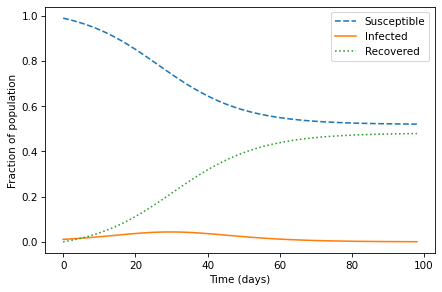

In [9]:
def run_simulation2(system, update_func):
    S = TimeSeries()
    I = TimeSeries()
    R = TimeSeries()
    state = system.init
    S[0], I[0], R[0] = state
    for t in range(0, system.t_end):
        state = update_func(t, state, system)
        S[t+1], I[t+1], R[t+1] = state.s, state.i, state.r
    return S, I, R
S, I, R = run_simulation2(system, update_func)
def plot_results(S, I, R):
    S.plot(style='--', label='Susceptible')
    I.plot(style='-', label='Infected')
    R.plot(style=':', label='Recovered')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')
plot_results(S, I, R)

Now With a TimeFrame

In [10]:
def run_simulation(system, update_func):
    frame = TimeFrame(columns=system.init.index)
    frame.loc[0] = system.init
    for t in range(0, system.t_end):
        frame.loc[t+1] = update_func(t, frame.loc[t], system)
    return frame
results = run_simulation(system, update_func)
results.head()

,s,i,r
0,0.988889,0.011111,0.000000
1,0.985226,0.011996,0.002778
2,0.981287,0.012936,0.005777
3,0.977055,0.013934,0.009011
4,0.972517,0.014988,0.012494


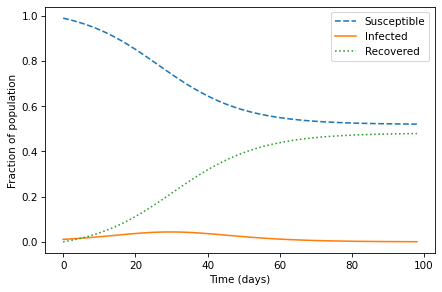

In [11]:
plot_results(results.s, results.i, results.r)

**Exercises**

Exercise 1

In [13]:
ct = 4
rt = 5
b = 1 / ct
g = 1 / rt
system = make_system(b, g)
s_s = system.init.s
final_state = run_simulation1(system, update_func)
s_e = final_state.s
s_s - s_e
result = run_simulation(system, update_func)
s_e = result.s[system.t_end]
s_s - s_e

0.3787177442414792